In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('Diabetes.csv')

In [3]:
d.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Judging from data (y variable = "diabetes" column), we can say that this is a binary classification problem.
There are 8 independent variables (other colums of the df), from which we have to determine if a patient has diabetes or not.

In [5]:
y = d['diabetes']
x = d[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2529)

Why linear regression should not be used for solving classification problems? -> blunder (a stupid or careless mistake), gives output in infeasible region

If solved using LR, the model will predict values greater than 1, less than 0, and between 0 and 1, which in our case (for a classification problem) is not a desired result. What will you interpret when the model says that diabetes is 1.5 or -0.71 or 0.43? That would be meaningless.

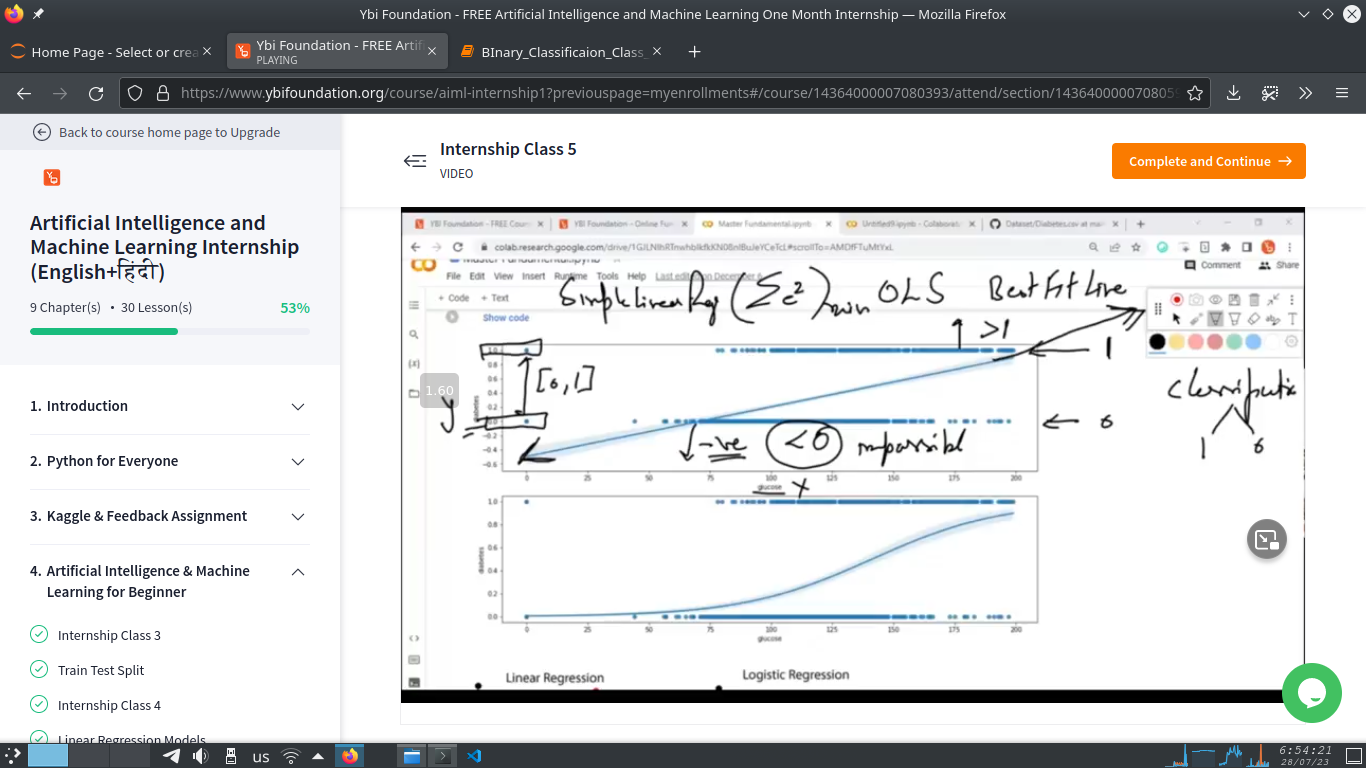

The logit/logistics/sigmoid function (1/(1+e^(-z))) (where "z = c + mx" or "z = b0 + b1*age + b2*glucode + ...") gives you a s-curve instread of a best-fit straight line (as in LR).
Properties of logit funtion:
1. for any value of x, between -inf to +inf, the y value is bounded between 0 and 1 (we would have 0.5 as the cut-off point, values greater than 0.5 will be assigned a value of 1, values less than 0.5 will be assigned a value of 0)
2. it gives you odd probability
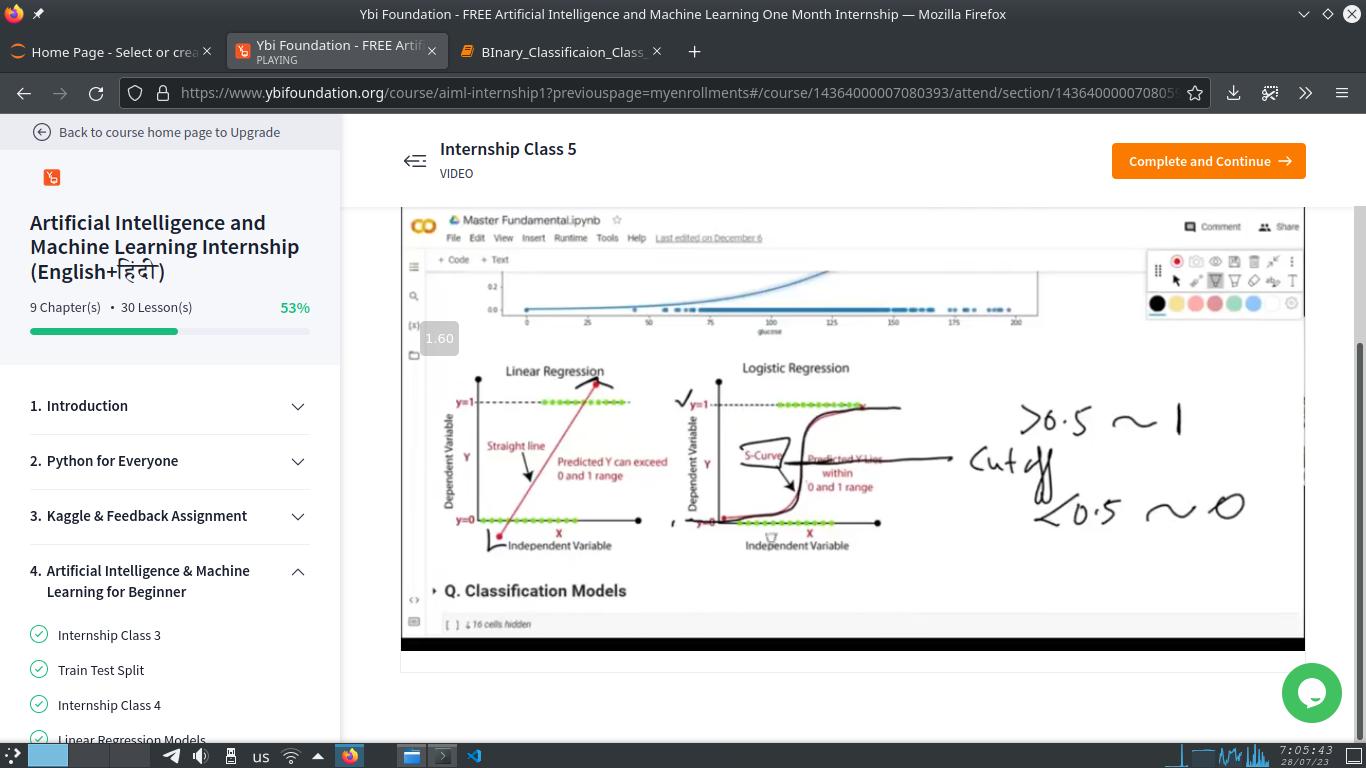

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [14]:
model.fit(x_train, y_train)

/home/rajat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The LR is solved using the interation method or more likelyhood method.
One can fit mne s-curves, so the best curve is find using the above method.
By default max iterations in 100, so in case if you such a warning, increase th max iterations by passin max_iter while instantiating the model.
Find a value of max_iter for which there's no warning message.
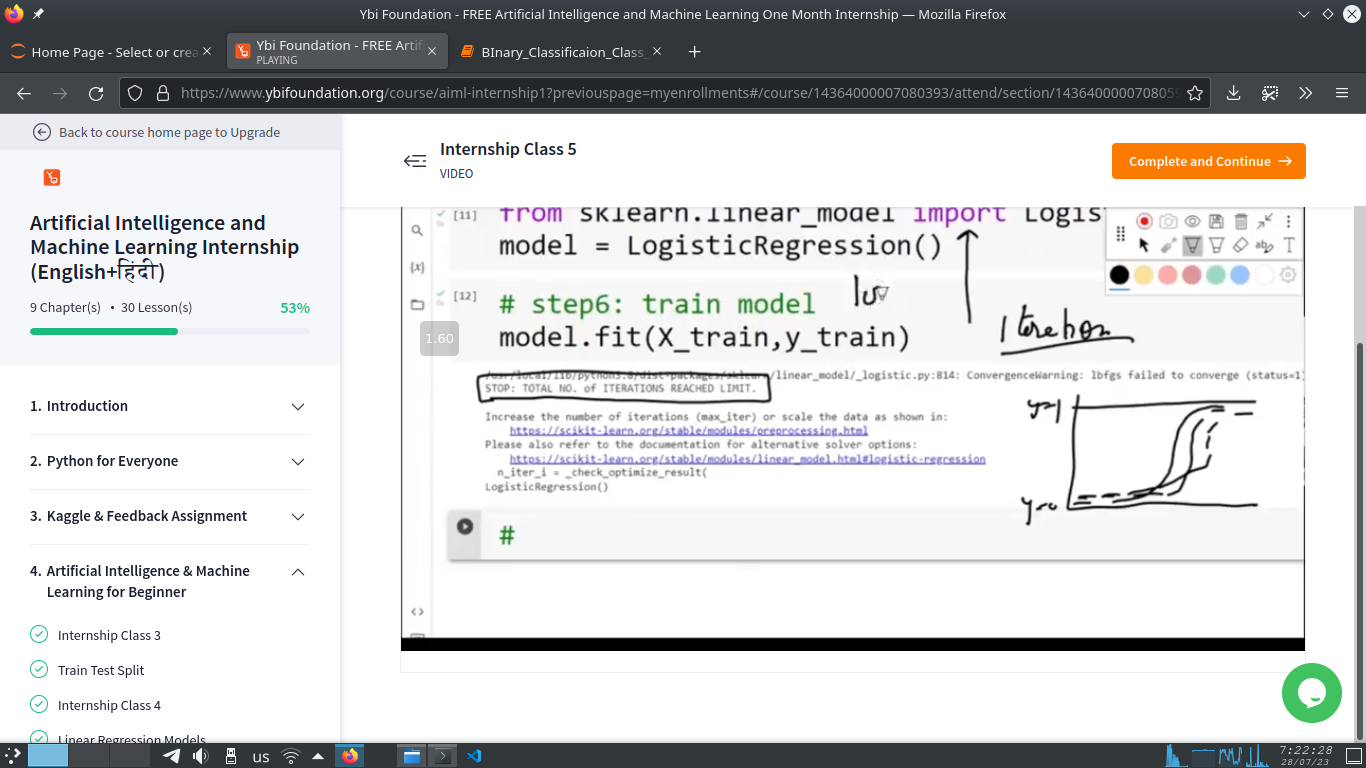

If the best curve is found for an iteration vaule below max_iter, then the algorithm would store there.
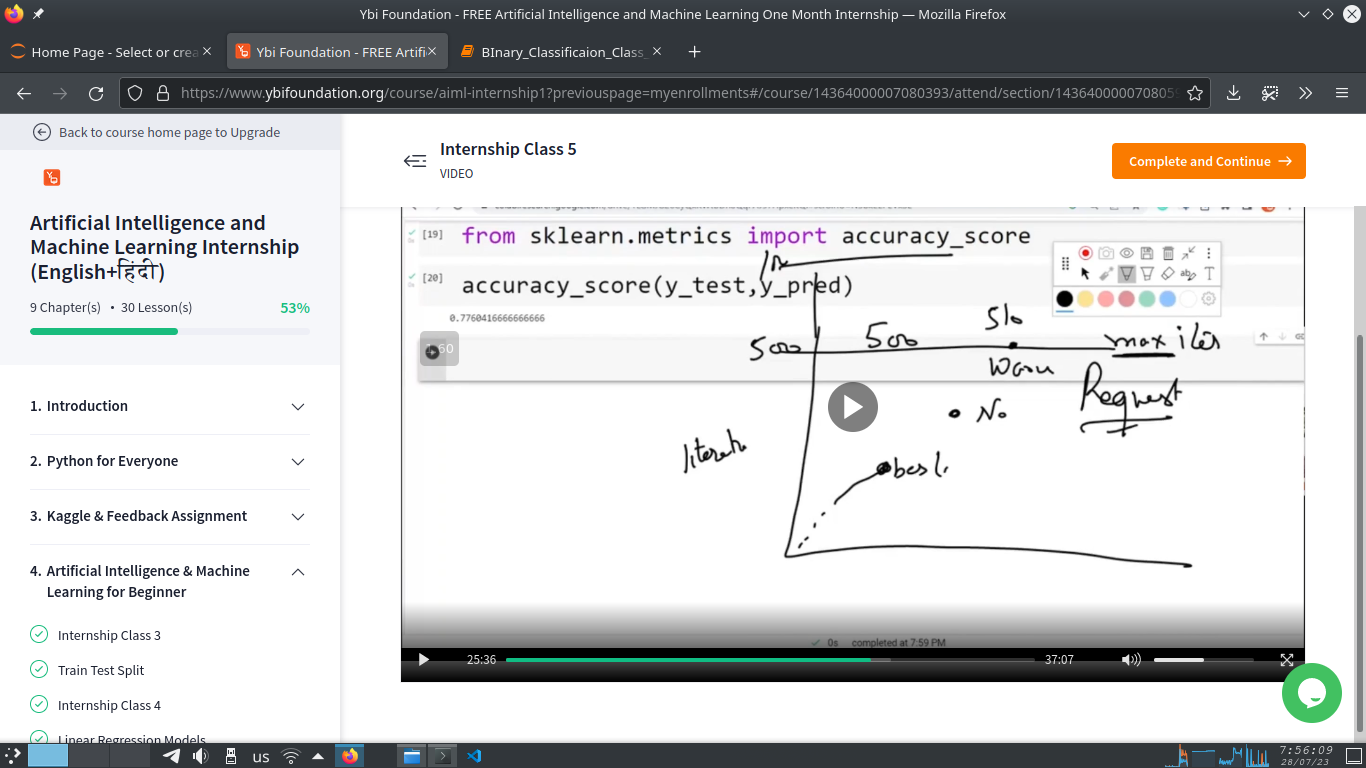

In [15]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [16]:
y_predict = model.predict(x_test)

In [19]:
# in this step of finding accuracy/error we do not Mean Square Errorm, Mean Absolute Error, or Mean Absolute Percentage Error
# here we would be finding the accuracy score since the nature of y is discrete and not continous
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7760416666666666

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
confusion_matrix(y_test,y_predict)

array([[105,  13],
       [ 37,  37]])

In [34]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       118
           1       0.74      0.50      0.60        74

    accuracy                           0.74       192
   macro avg       0.74      0.69      0.70       192
weighted avg       0.74      0.74      0.73       192



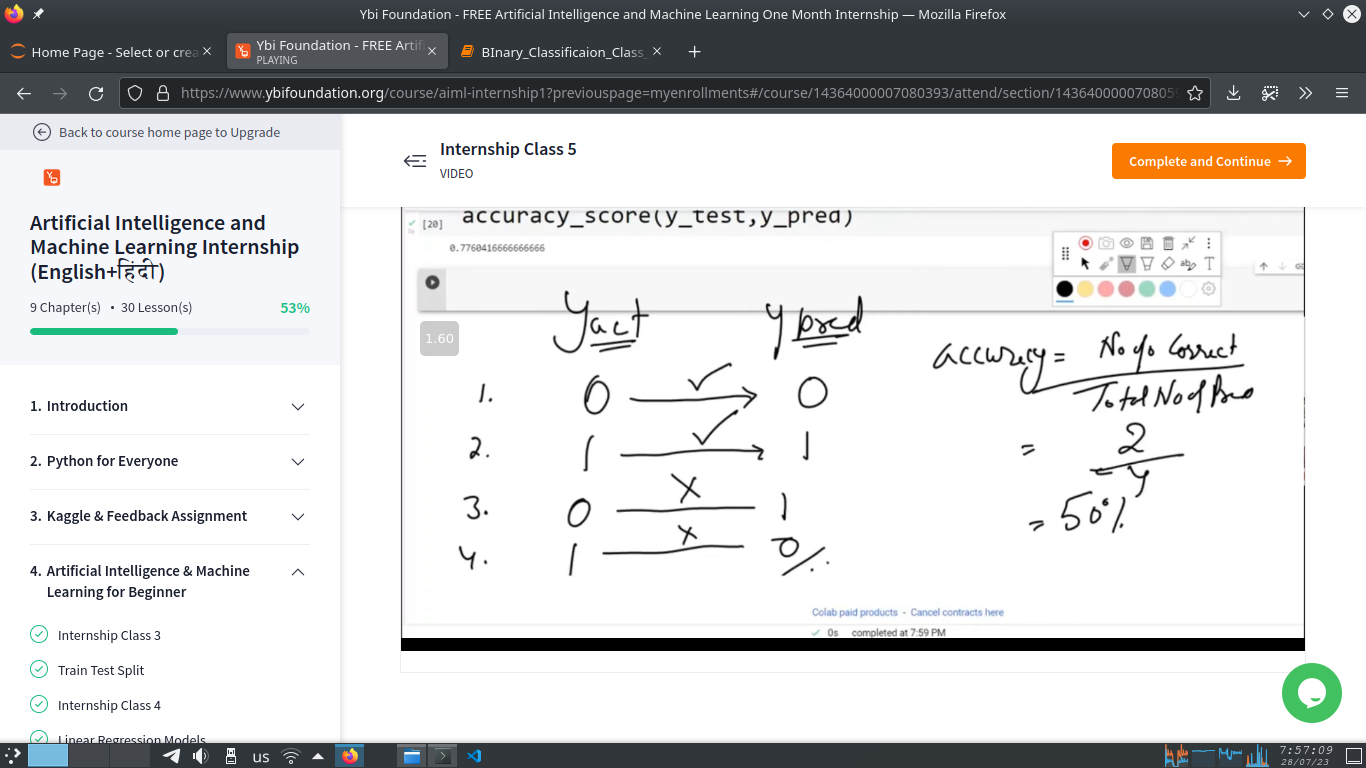

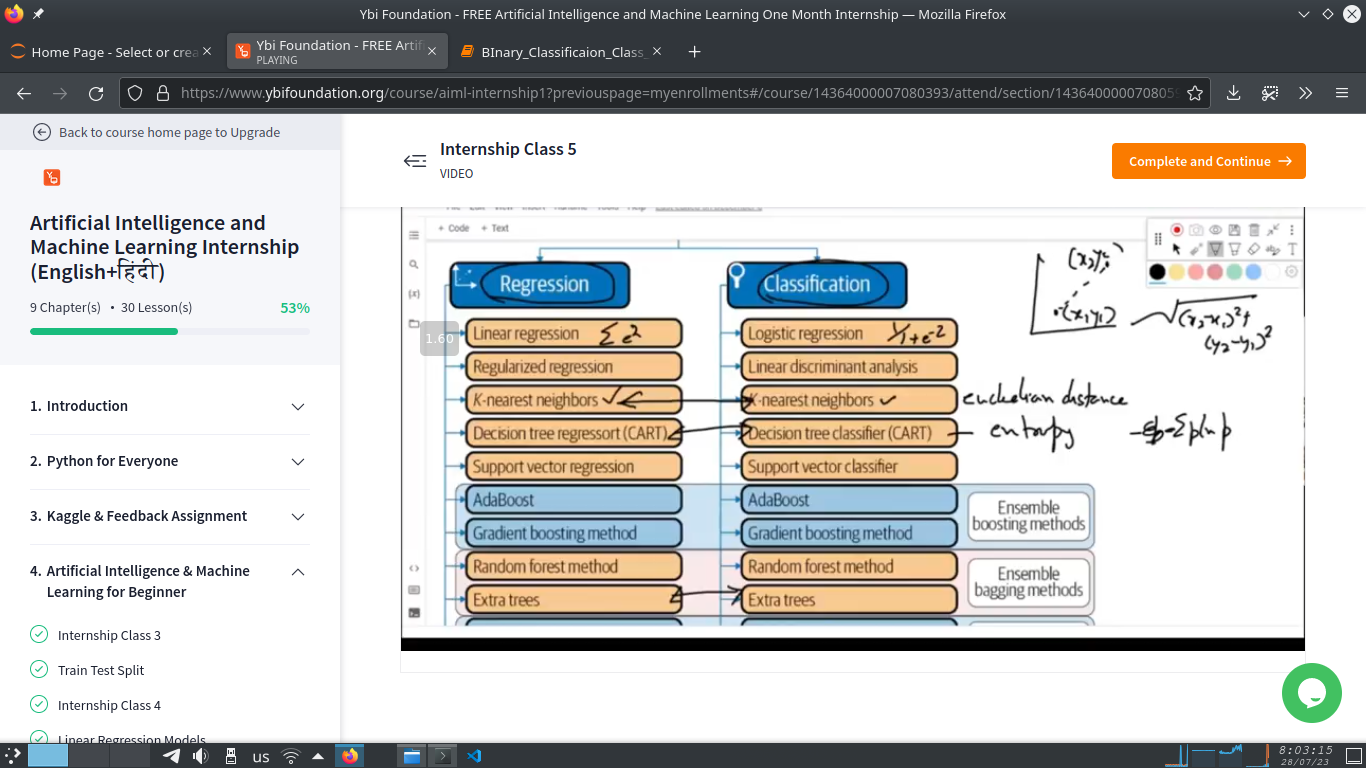

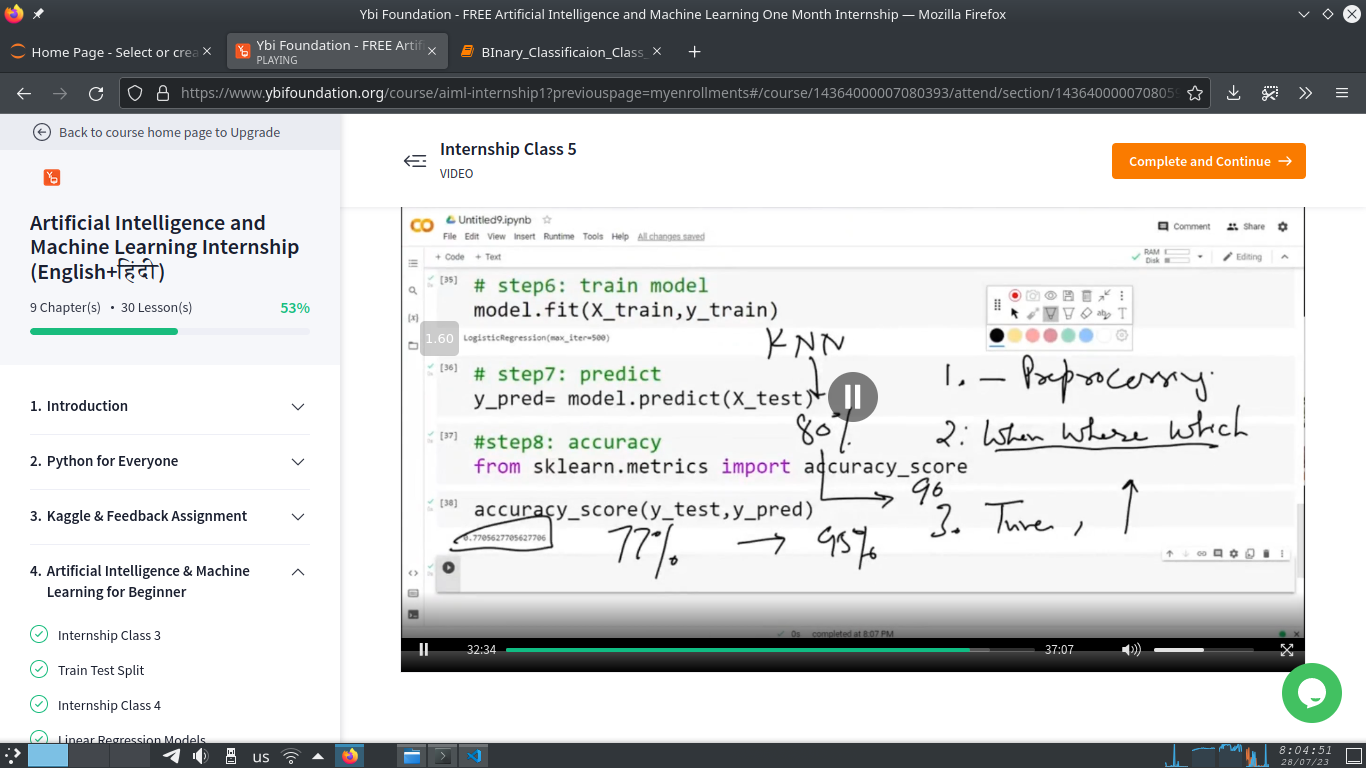

In [27]:
# what effect do other models have on this problem?

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test, y_predict)

0.6770833333333334

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test, y_predict)

0.6927083333333334

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test, y_predict)

0.7395833333333334

You should have an unserstanding of why this model gives this accuracy, why this model les less or more as compared to other? etc. This comes with practice and experience and ofcourse the more in depth understanding you have of the underlying mathematics.